# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/final_data.csv')
df

,city,bd,gender,registered_via,is_churn,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_duration,listening_duration
0,4,30,1,9,0,603,2980,3129,0.000000,1.00,...,21,77,22,16,44,658,287,171508.646,2070,781
1,5,34,1,9,1,360,1072,1072,0.000000,0.00,...,2,145,84,58,42,1678,1158,448313.054,2168,220
2,13,63,1,9,0,783,3874,4023,0.000000,1.00,...,27,1173,390,246,308,5003,5784,1435958.164,2047,817
3,4,28,0,9,0,270,1589,1738,0.000000,0.90,...,10,81,20,12,16,438,343,107171.103,2021,761
4,22,38,0,9,0,784,3874,4023,0.000000,1.00,...,27,711,528,246,218,1129,2593,419622.336,2020,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356272,10,27,1,9,0,390,1937,1937,0.000000,1.00,...,13,2265,462,312,298,15127,15472,3923982.034,577,535
356273,4,31,1,4,0,390,1937,1937,0.000000,1.00,...,13,290,95,45,29,2500,2659,668510.530,580,531
356274,5,21,0,9,0,490,2189,2189,0.000000,0.25,...,12,1758,473,293,278,6635,5013,1780429.233,545,529
356275,5,22,1,7,0,540,1782,1782,0.000000,1.00,...,18,953,178,74,164,7081,7023,1865451.074,548,527


# EDA

In [3]:
df.columns

Index(['city', 'bd', 'gender', 'registered_via', 'is_churn',
       'payment_plan_sum', 'plan_list_price', 'actual_amount_paid',
       'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'registration_duration', 'listening_duration'],
      dtype='object')

1. 범주형 데이터 분포 분석
- gender
- city
- registered_via
- is_auto_renew
- is_calcel

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\699823846.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="is_churn", data=df, ci=None, palette="husl")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\699823846.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="is_churn", data=df, ci=None, palette="husl")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\699823846.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="is_churn", data=df, ci=None, palette="husl")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\699823846.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

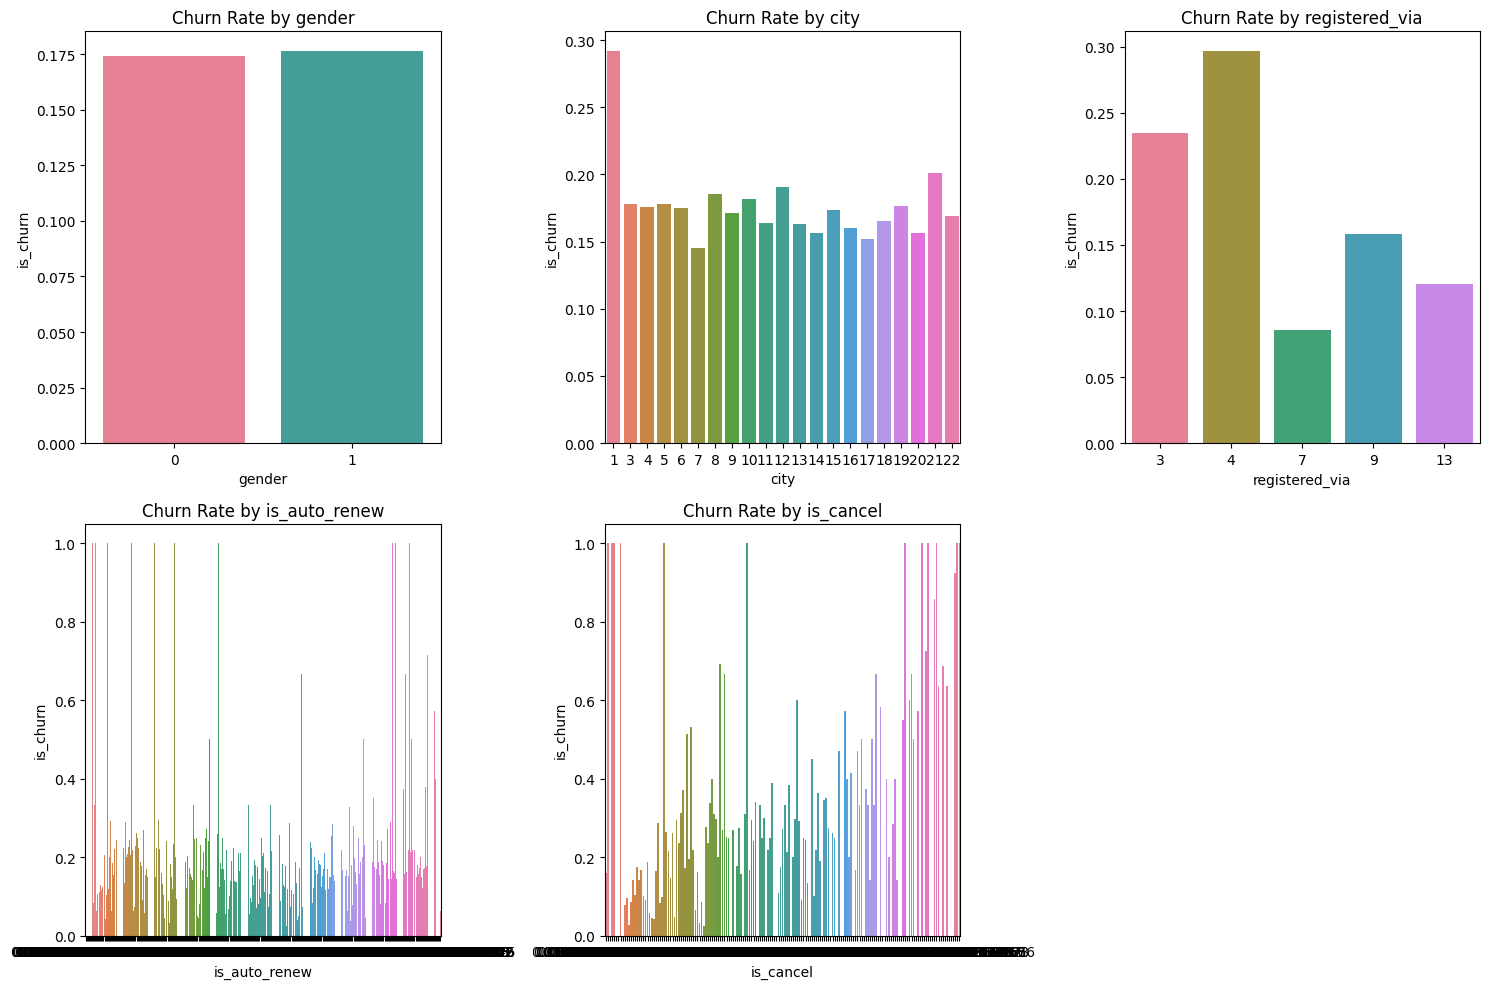

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['gender', 'city', 'registered_via', 'is_auto_renew', 'is_cancel']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=col, y="is_churn", data=df, ci=None, palette="husl")
    plt.title(f"Churn Rate by {col}")

plt.tight_layout()
plt.show()


- 성별(gender): 특정 성별이 더 많이 이탈하는가? 성별에서는 이탈율이 비등
- 도시(city): 특정 지역에서 이탈률이 높은가? 1번 도시일 수록 이탈율 큼
- 가입 경로(registered_via): 특정 가입 경로가 이탈률에 영향을 주는가? 4번경로로 가입한 사람일 경우에 이탈율이 큼
- 자동 갱신 여부(is_auto_renew): 자동 갱신이 이탈을 줄이는가? 꼭 그런거같지 않음 (추가 분석필요)
- 구독 취소 여부(is_cancel): 구독 취소 경험이 이탈로 이어지는가? 꼭 그런거 같지 않음 (추가 분석필요)

2. 수치형 변수 분포 및 상관관계 분석
- heatmap
- boxplot

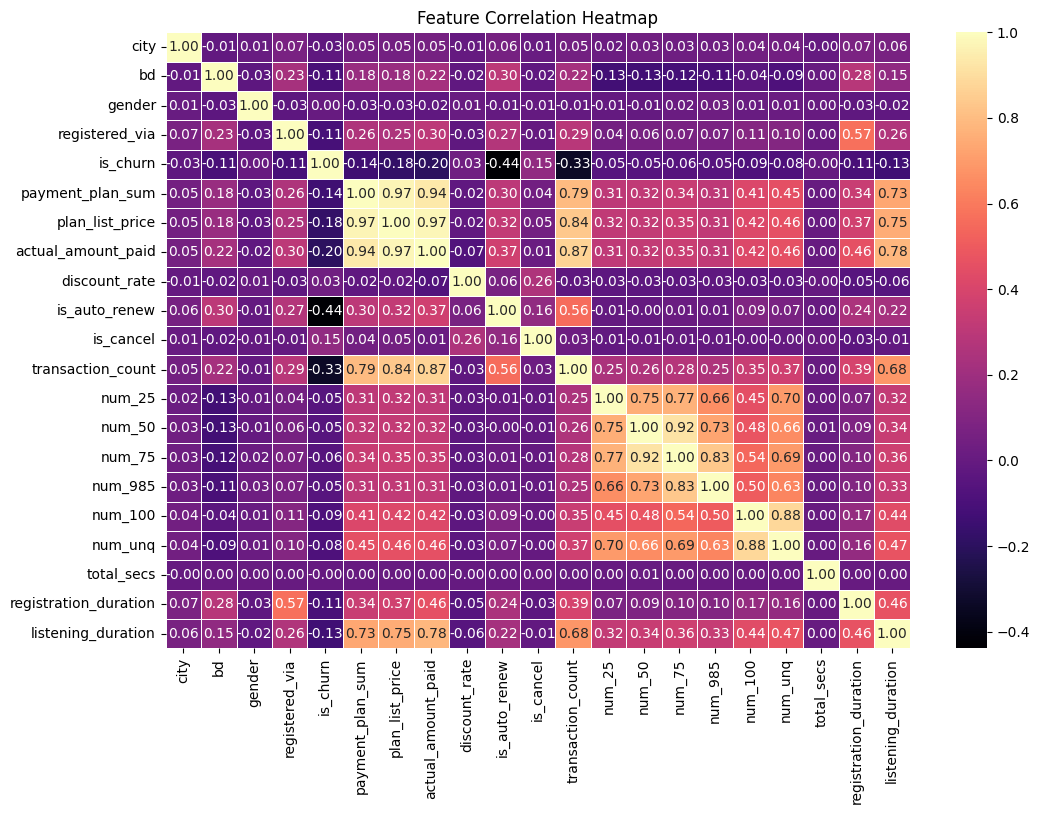

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="magma", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\1539348973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_churn', y=col, data=df, palette="coolwarm")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\1539348973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_churn', y=col, data=df, palette="coolwarm")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\1539348973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_churn', y=col, data=df, palette="coolwarm")
C:\Users\Playdata\AppData\Local\Temp\ipykernel

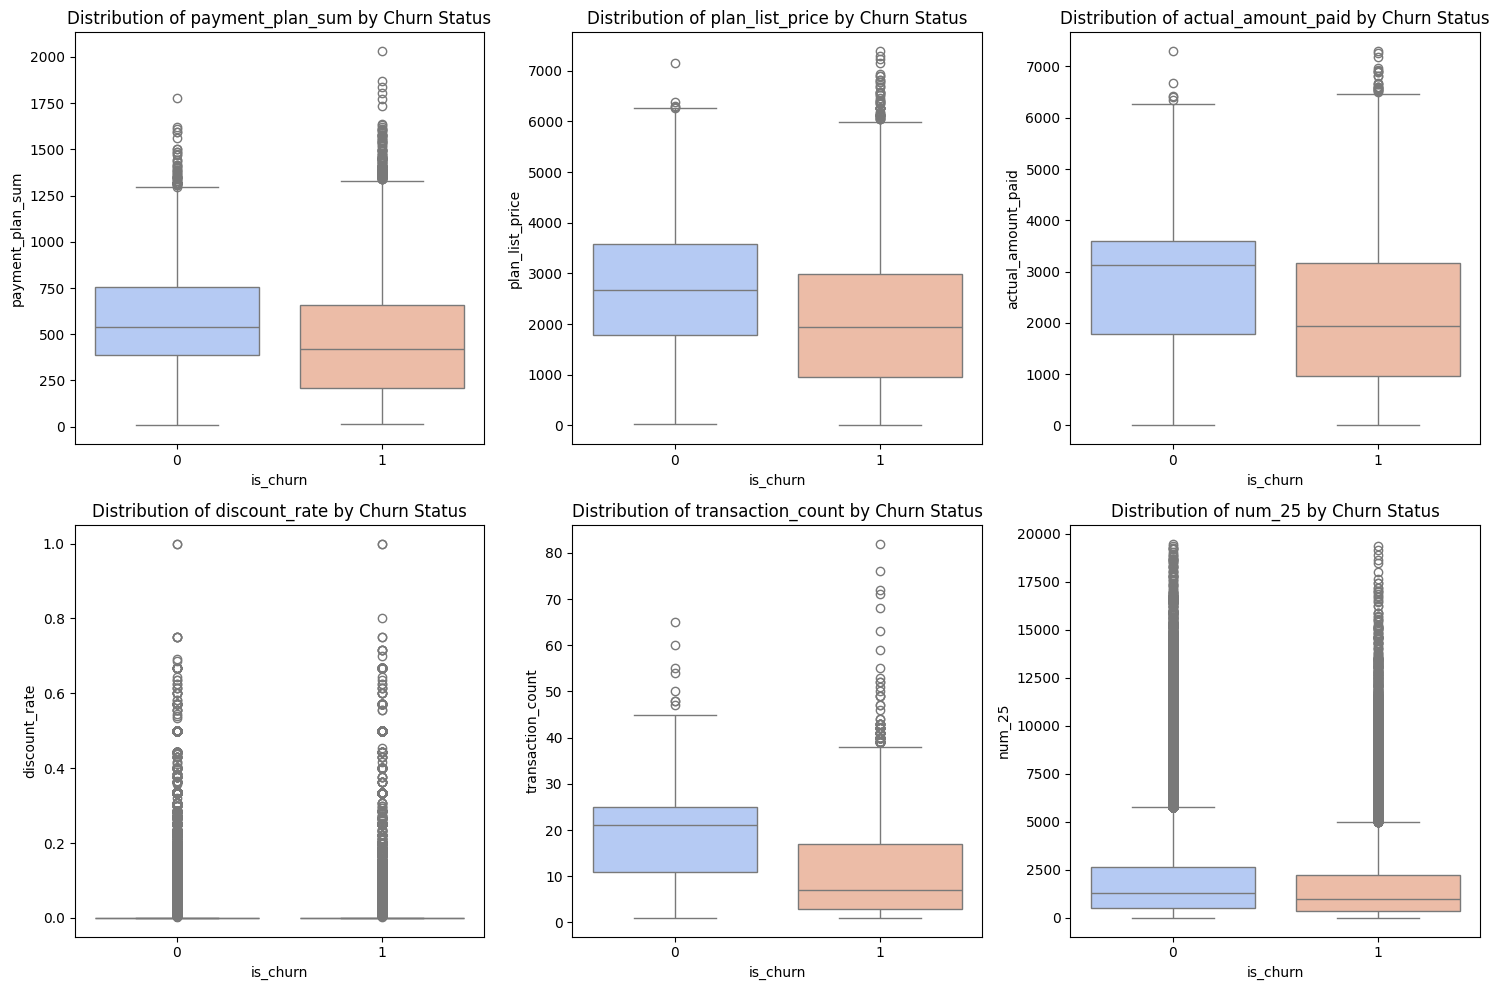

In [6]:
numerical_features = [
    'payment_plan_sum', 'plan_list_price', 'actual_amount_paid', 'discount_rate',
    'transaction_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
    'num_unq', 'total_secs', 'registration_duration', 'listening_duration'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features[:6], 1):  # 일부 컬럼만 예제
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_churn', y=col, data=df, palette="coolwarm")
    plt.title(f"Distribution of {col} by Churn Status")

plt.tight_layout()
plt.show()


3. 특성간 관계 시각화

- 결제금액 vs 이탈율

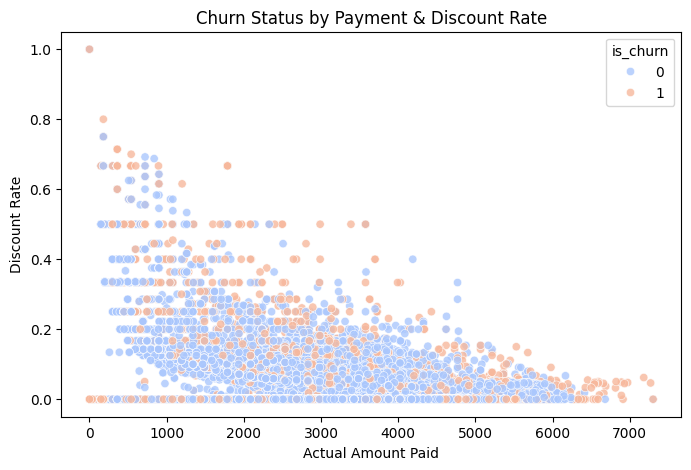

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='actual_amount_paid', y='discount_rate', hue='is_churn', alpha=0.8, palette="coolwarm")
plt.xlabel("Actual Amount Paid")
plt.ylabel("Discount Rate")
plt.title("Churn Status by Payment & Discount Rate")
plt.show()


- 할인을 많이 받은 고객이 더 많이 이탈하는가?
- 비싼 플랜을 결제한 고객은 오래 유지되는가?

    - 결론: 할인을 많이 받지 않으면서 비싼 플랜을 결재한 고객일 수록 이탈율이 높다, 보통 데이터가 많이 분포한 곳에서의 이탈율은 다른 변수가 작용했을 가능성이 있다.

- 고객 청취 행동 분석

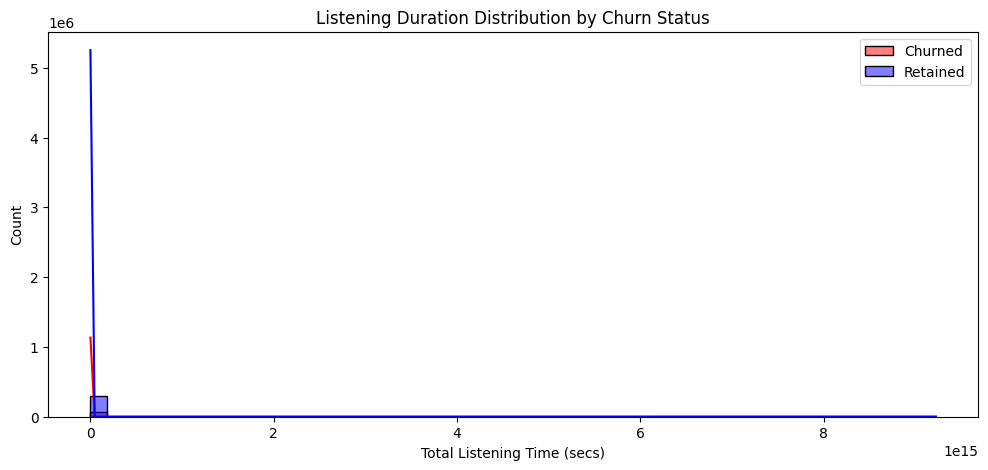

In [8]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['is_churn'] == 1]['total_secs'], bins=50, color='red', label="Churned", kde=True)
sns.histplot(df[df['is_churn'] == 0]['total_secs'], bins=50, color='blue', label="Retained", kde=True)
plt.xlabel("Total Listening Time (secs)")
plt.ylabel("Count")
plt.legend()
plt.title("Listening Duration Distribution by Churn Status")
plt.show()


- 청취 시간이 적은 고객이 더 많이 이탈하는가?
- 이탈 고객과 유지 고객의 청취 시간 차이가 확연한가?

추가 EDA
- plan_list_plan
- actual_amount_paid,
- num_25, num_50. num_75, num_985, num_100
- num_unq
- total_seq

In [9]:
df.columns

Index(['city', 'bd', 'gender', 'registered_via', 'is_churn',
       'payment_plan_sum', 'plan_list_price', 'actual_amount_paid',
       'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'registration_duration', 'listening_duration'],
      dtype='object')

### 1. 청취 패턴 분석
- 청취 비율별 곡 수 분포
    - 곡을 얼마나 끝까지 듣는지 여부

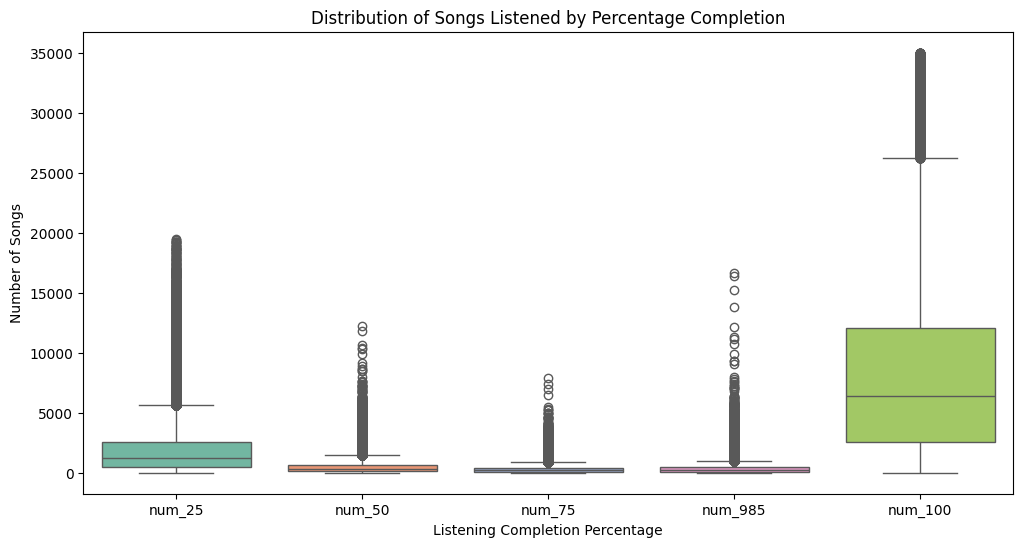

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['num_25', 'num_50', 'num_75', 'num_985', 'num_100']], palette="Set2")
plt.title("Distribution of Songs Listened by Percentage Completion")
plt.ylabel("Number of Songs")
plt.xlabel("Listening Completion Percentage")
plt.show()


another

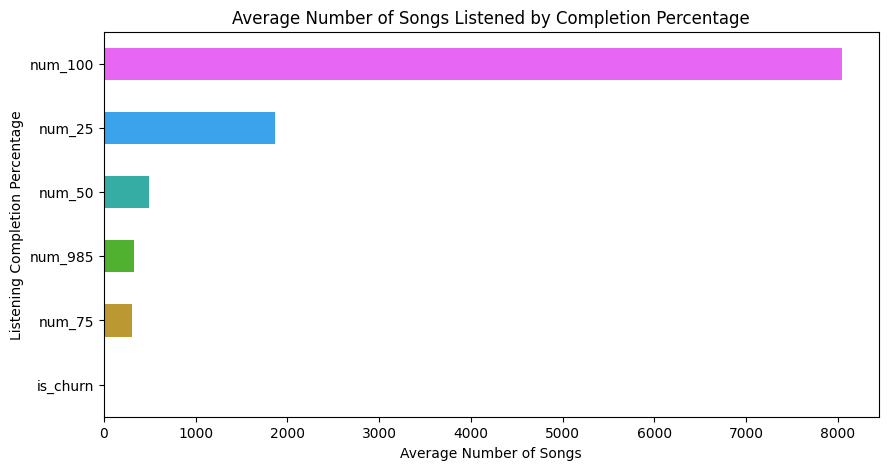

In [11]:
plt.figure(figsize=(10, 5))
avg_listen_counts = df[['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'is_churn']].mean()
avg_listen_counts.sort_values().plot(kind='barh', color=sns.color_palette("husl", len(avg_listen_counts)))

plt.xlabel("Average Number of Songs")
plt.ylabel("Listening Completion Percentage")
plt.title("Average Number of Songs Listened by Completion Percentage")
plt.show()

💡 해석

- 25% 이하만 듣는 곡(num_25)이 가장 많다면, 사람들이 쉽게 스킵하는 곡이 많다는 의미.
- 100%까지 듣는 곡(num_100)이 적다면, 사용자들이 끝까지 듣는 음악이 적다는 뜻.

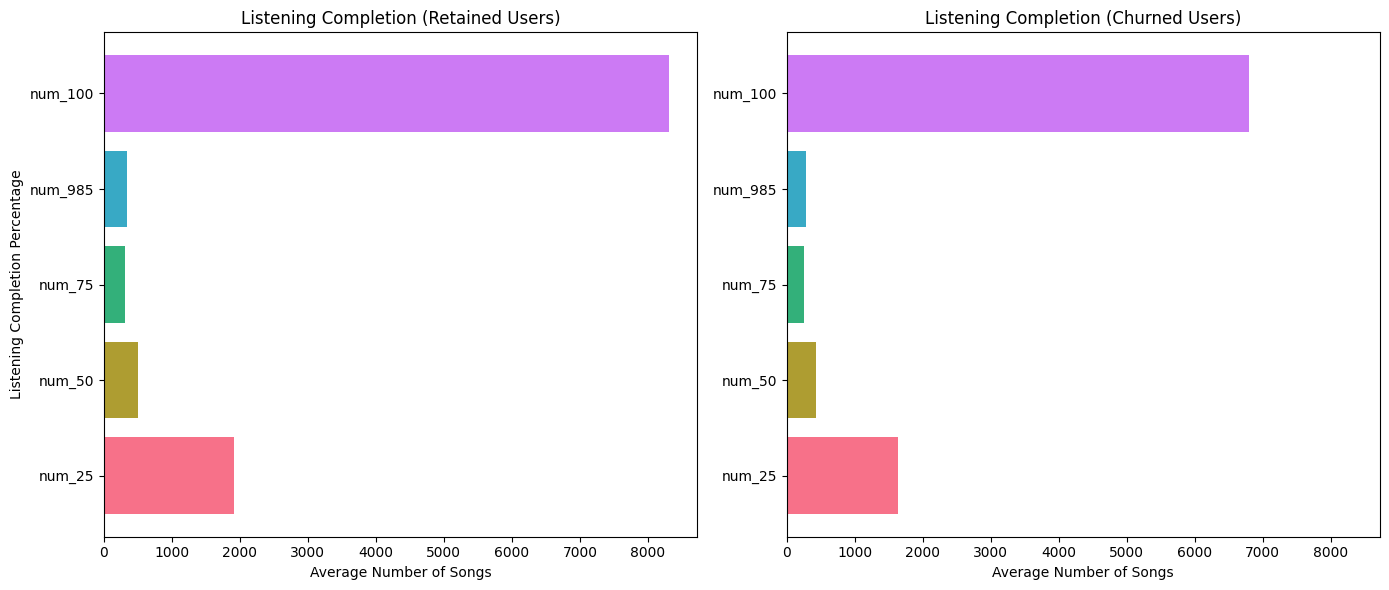

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# is_churn 값이 0인 데이터와 1인 데이터를 나눠서 평균 계산
churn_0 = df[df['is_churn'] == 0][['num_25', 'num_50', 'num_75', 'num_985', 'num_100']].mean()
churn_1 = df[df['is_churn'] == 1][['num_25', 'num_50', 'num_75', 'num_985', 'num_100']].mean()

# 색상 설정
colors_0 = sns.color_palette("husl", len(churn_0))
colors_1 = sns.color_palette("husl", len(churn_1))

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# is_churn == 0
axes[0].barh(churn_0.index, churn_0.values, color=colors_0)
axes[0].set_xlabel("Average Number of Songs")
axes[0].set_ylabel("Listening Completion Percentage")
axes[0].set_title("Listening Completion (Retained Users)")

# is_churn == 1
axes[1].barh(churn_1.index, churn_1.values, color=colors_1)
axes[1].set_xlabel("Average Number of Songs")
axes[1].set_title("Listening Completion (Churned Users)")

# 레이아웃 조정
plt.tight_layout()
plt.show()

- 고유 곡 수 vs 총 청취 시간 관계
    - num_unq와 total_secs간 관계 분석

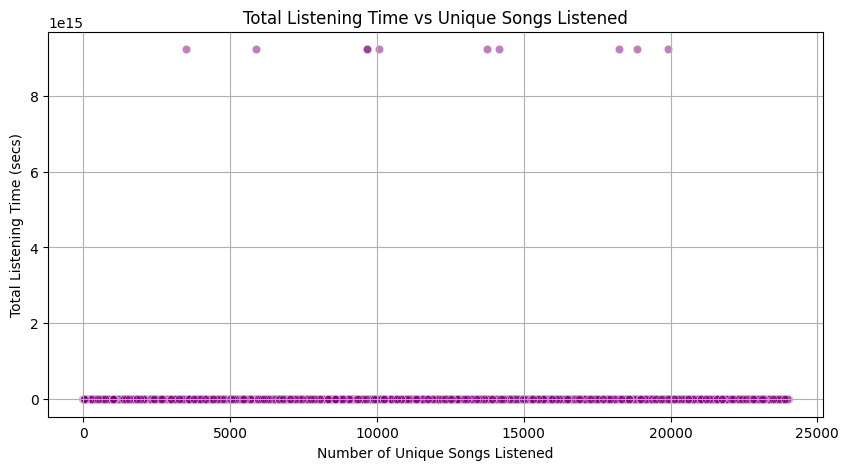

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='num_unq', y='total_secs', alpha=0.5, color='purple')
plt.xlabel("Number of Unique Songs Listened")
plt.ylabel("Total Listening Time (secs)")
plt.title("Total Listening Time vs Unique Songs Listened")
plt.grid()
plt.show()


num_unq 컬럼기준
- 2000곡 미만
- 2000 이상 6000곡 미만
- 6000곡 이상

    song_range  listening_time_ratio_hours
0       < 2000                    0.080626
1  2000 - 6000                12226.588371
2      >= 6000                 8044.268589


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\497625966.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_by_range = df.groupby('song_range')['listening_time_ratio_hours'].mean().reset_index()


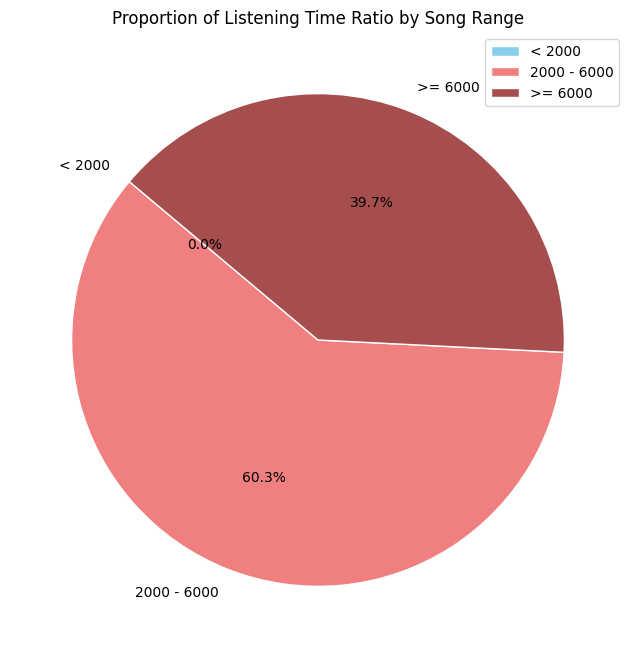

In [14]:
# 고유곡 수에 따라 구간 나누기
bins = [0, 2000, 6000, float('inf')]  # 2000 미만, 2000 이상 6000 미만, 6000 이상
labels = ['< 2000', '2000 - 6000', '>= 6000']
df['song_range'] = pd.cut(df['num_unq'], bins=bins, labels=labels, right=False)

# 고유곡 수 대비 총 청취시간 비율 계산
df['listening_time_ratio'] = df['total_secs'] / df['num_unq']
df['listening_time_ratio_hours'] = df['listening_time_ratio'] / 3600  # 3600초 = 1시간

# 구간별 평균 비율 계산
ratio_by_range = df.groupby('song_range')['listening_time_ratio_hours'].mean().reset_index()
print(ratio_by_range)

# Pie Chart: 각 구간 비율
plt.figure(figsize=(8, 8))
plt.pie(ratio_by_range['listening_time_ratio_hours'], labels=ratio_by_range['song_range'], autopct='%0.001f%%', startangle=140, wedgeprops={'edgecolor': 'white'}, colors=["skyblue", "lightcoral", "#A64D4D"])
plt.title("Proportion of Listening Time Ratio by Song Range")
plt.legend()
plt.show()

    song_range  listening_time_ratio_hours
0       < 2000                    0.081527
1  2000 - 6000                14875.992838
2      >= 6000                 7893.197077
    song_range  listening_time_ratio_hours
0       < 2000                    0.077949
1  2000 - 6000                    0.075082
2      >= 6000                 8917.127979


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\3382984601.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_retained = df_retained.groupby('song_range')['listening_time_ratio_hours'].mean().reset_index()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\3382984601.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_churned = df_churned.groupby('song_range')['listening_time_ratio_hours'].mean().reset_index()


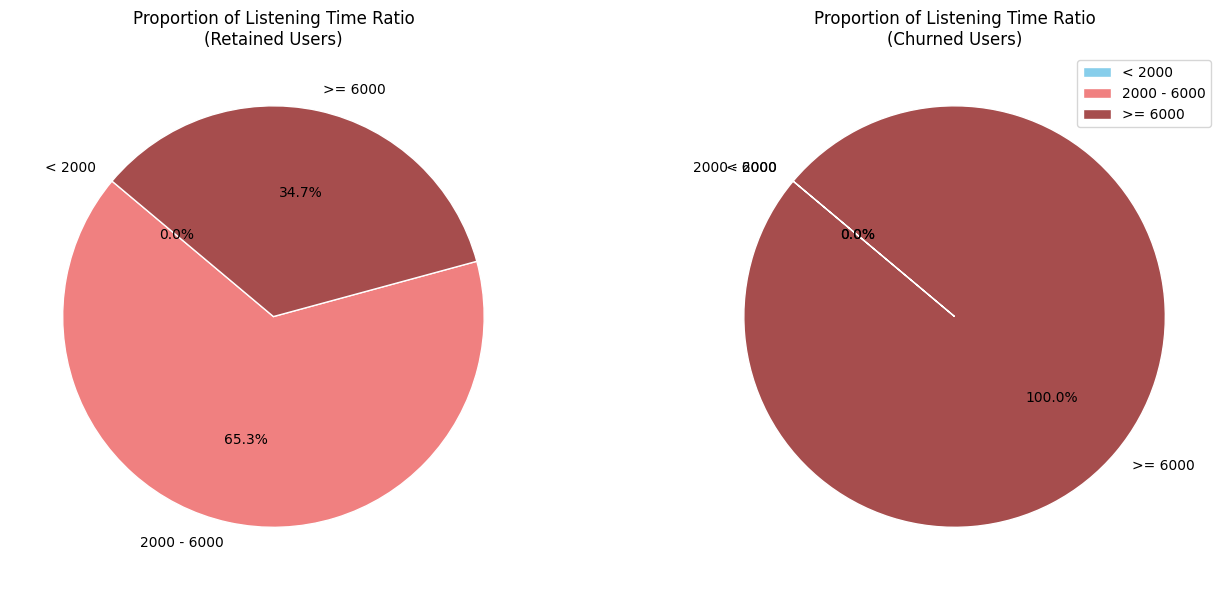

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 고유곡 수에 따라 구간 나누기
bins = [0, 2000, 6000, float('inf')]  # 2000 미만, 2000 이상 6000 미만, 6000 이상
labels = ['< 2000', '2000 - 6000', '>= 6000']

df['song_range'] = pd.cut(df['num_unq'], bins=bins, labels=labels, right=False)

# 고유곡 수 대비 총 청취시간 비율 계산 (시간 단위)
df['listening_time_ratio_hours'] = (df['total_secs'] / df['num_unq']) / 3600  # 초 -> 시간 변환

# is_churn=0 (Retained Users)과 is_churn=1 (Churned Users) 데이터 분리
df_retained = df[df['is_churn'] == 0]
df_churned = df[df['is_churn'] == 1]

# 구간별 평균 비율 계산
ratio_retained = df_retained.groupby('song_range')['listening_time_ratio_hours'].mean().reset_index()
ratio_churned = df_churned.groupby('song_range')['listening_time_ratio_hours'].mean().reset_index()

print(ratio_retained)
print(ratio_churned)

# 색상 팔레트 설정
colors=["skyblue", "lightcoral", "#A64D4D"]

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Retained Users (is_churn=0)
axes[0].pie(
    ratio_retained['listening_time_ratio_hours'],
    labels=ratio_retained['song_range'],
    autopct='%0.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=colors
)
axes[0].set_title("Proportion of Listening Time Ratio\n(Retained Users)")

# Churned Users (is_churn=1)
axes[1].pie(
    ratio_churned['listening_time_ratio_hours'],
    labels=ratio_churned['song_range'],
    autopct='%0.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=colors
)
axes[1].set_title("Proportion of Listening Time Ratio\n(Churned Users)")

plt.legend()
plt.tight_layout()
plt.show()

### 2. 요금제 관련 분석
- 요금제 가격과 실제 결제 금액 비교
    - plan_list_price vs actual_amount_paid 비교하여 얼마나 할인이 적용되는지 분석

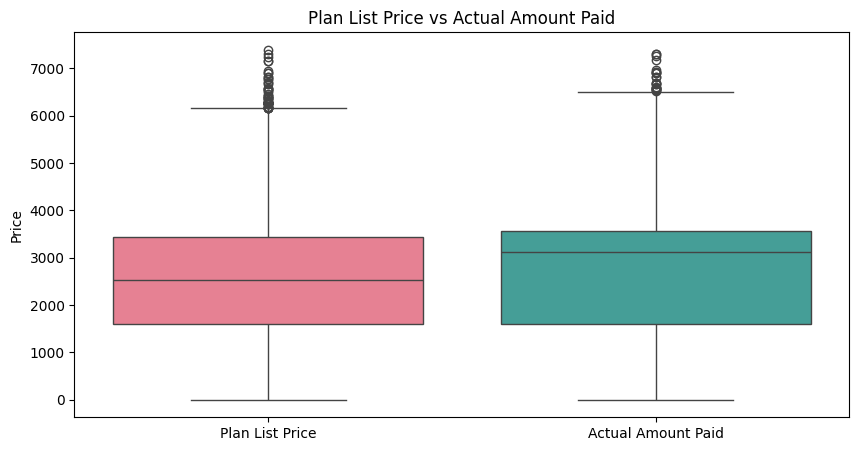

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['plan_list_price', 'actual_amount_paid']], palette="husl")
plt.title("Plan List Price vs Actual Amount Paid")
plt.ylabel("Price")
plt.xticks(ticks=[0, 1], labels=["Plan List Price", "Actual Amount Paid"])
plt.show()

- 요금제 가격 vs 실제 결제 금액
    - plan_list_price와 actual_amount_paid의 추이를 bar chart로 확인

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\529988953.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = df.groupby('price_range')[['plan_list_price', 'actual_amount_paid']].mean().reset_index()


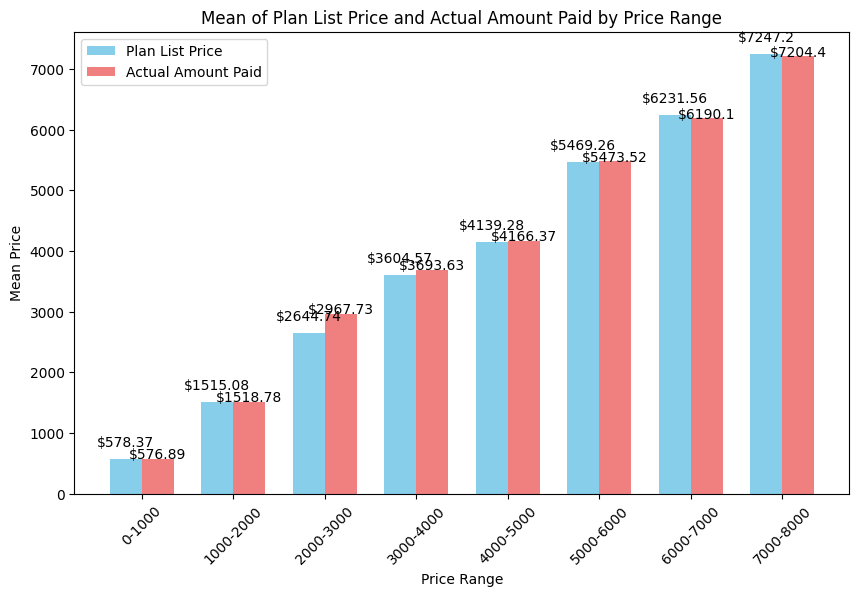

In [16]:
# 요금제 가격을 1000단위로 범주화
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]  # 구간 확장
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000']
df['price_range'] = pd.cut(df['plan_list_price'], bins=bins, labels=labels, right=False)

# 각 가격 구간에 대해 plan_list_price와 actual_amount_paid의 평균 계산
mean_prices = df.groupby('price_range')[['plan_list_price', 'actual_amount_paid']].mean().reset_index()

# 날씬한 그래프를 위해 figsize 수정
plt.figure(figsize=(10, 6))

# 다중 bar 그래프 (plan_list_price와 actual_amount_paid)
bar_width = 0.35
index = range(len(mean_prices))

# 첫 번째 그래프: Plan List Price
bars_1 = plt.bar(index, mean_prices['plan_list_price'], width=bar_width, color='skyblue', label='Plan List Price')

# 두 번째 그래프: Actual Amount Paid
bars_2 = plt.bar([i + bar_width for i in index], mean_prices['actual_amount_paid'], width=bar_width, color='lightcoral', label='Actual Amount Paid')

# 그래프 위에 숫자 표시 (단위 '$' 추가, 겹치지 않도록 y 위치 조정)
for bar in bars_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 160, f"${round(yval, 2)}", ha='center', va='bottom', fontsize=10)

for bar in bars_2:
    yval = bar.get_height()
    # y값을 약간 다르게 조정해서 겹치지 않도록 함
    plt.text(bar.get_x() + bar.get_width()/2, yval-50, f"${round(yval, 2)}", ha='center', va='bottom', fontsize=10)

# x축, y축 설정
plt.xlabel("Price Range")
plt.ylabel("Mean Price")
plt.title("Mean of Plan List Price and Actual Amount Paid by Price Range")

# x축 라벨 45도 회전
plt.xticks([i + bar_width / 2 for i in index], mean_prices['price_range'], rotation=45)

# 범례 설정
plt.legend()

# 그래프 표시
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\522004770.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices_retained = df_retained.groupby('price_range')[['plan_list_price', 'actual_amount_paid']].mean().reset_index()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15632\522004770.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices_churned = df_churned.groupby('price_range')[['plan_list_price', 'actual_amount_paid']].mean().reset_index()


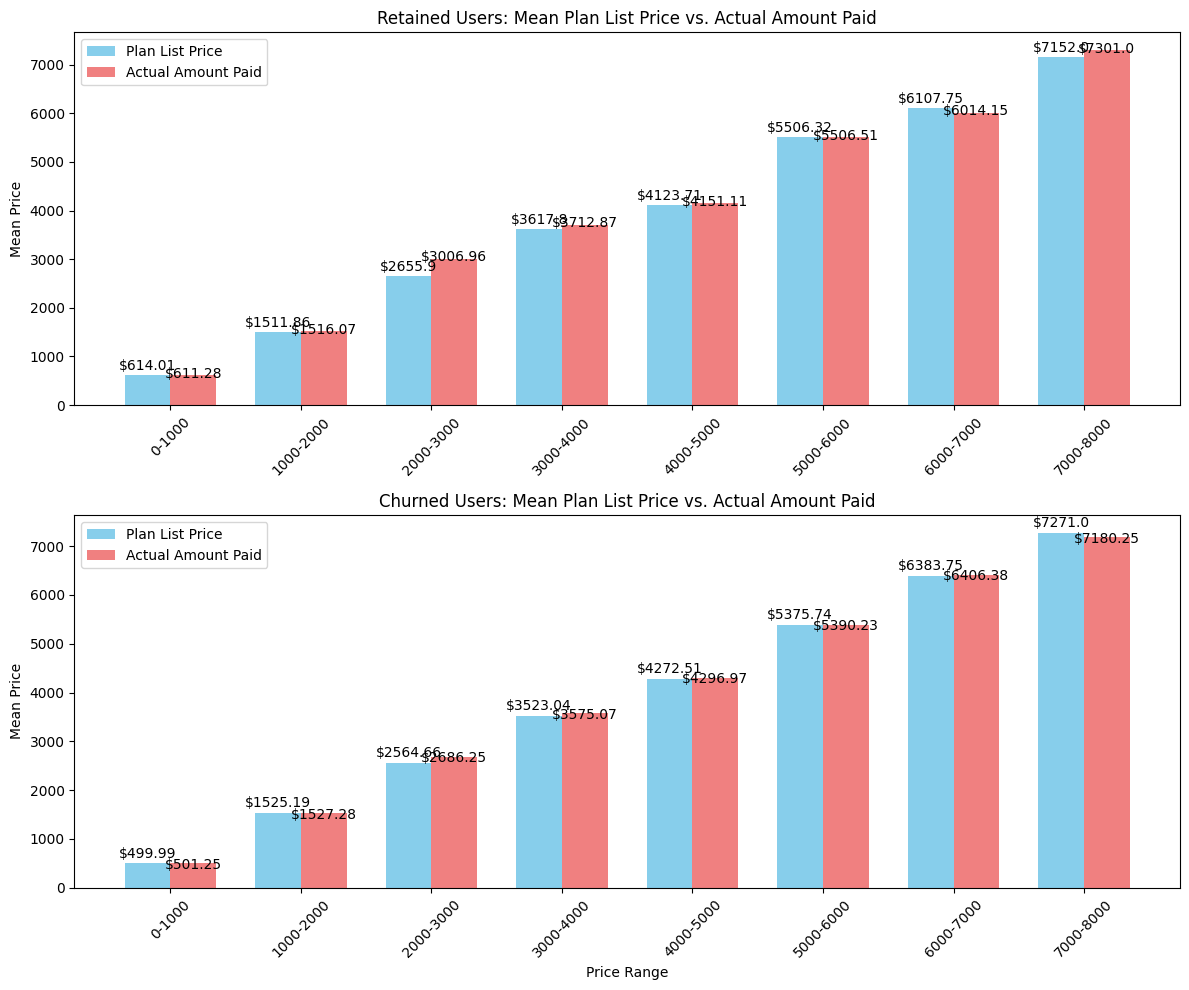

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 요금제 가격을 1000 단위로 범주화
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]  # 구간 확장
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000']
df['price_range'] = pd.cut(df['plan_list_price'], bins=bins, labels=labels, right=False)

# is_churn=0 (Retained Users)과 is_churn=1 (Churned Users) 데이터 분리
df_retained = df[df['is_churn'] == 0]
df_churned = df[df['is_churn'] == 1]

# 각 가격 구간별 평균 값 계산
mean_prices_retained = df_retained.groupby('price_range')[['plan_list_price', 'actual_amount_paid']].mean().reset_index()
mean_prices_churned = df_churned.groupby('price_range')[['plan_list_price', 'actual_amount_paid']].mean().reset_index()

# 서브플롯 설정 (2×1 형식)
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# 공통 설정
bar_width = 0.35
colors = ["skyblue", "lightcoral"]  # 예쁜 색상 선택

# 첫 번째 그래프 (Retained Users)
index = range(len(mean_prices_retained))
bars_1 = axes[0].bar(index, mean_prices_retained['plan_list_price'], width=bar_width, color=colors[0], label='Plan List Price')
bars_2 = axes[0].bar([i + bar_width for i in index], mean_prices_retained['actual_amount_paid'], width=bar_width, color=colors[1], label='Actual Amount Paid')

axes[0].set_xticks([i + bar_width / 2 for i in index])
axes[0].set_xticklabels(mean_prices_retained['price_range'], rotation=45)
axes[0].set_ylabel("Mean Price")
axes[0].set_title("Retained Users: Mean Plan List Price vs. Actual Amount Paid")
axes[0].legend()

# 숫자 라벨 추가 (첫 번째 그래프)
for bar in bars_1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 100, f"${round(yval, 2)}", ha='center', fontsize=10)

for bar in bars_2:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval - 50, f"${round(yval, 2)}", ha='center', fontsize=10)

# 두 번째 그래프 (Churned Users)
index = range(len(mean_prices_churned))
bars_3 = axes[1].bar(index, mean_prices_churned['plan_list_price'], width=bar_width, color=colors[0], label='Plan List Price')
bars_4 = axes[1].bar([i + bar_width for i in index], mean_prices_churned['actual_amount_paid'], width=bar_width, color=colors[1], label='Actual Amount Paid')

axes[1].set_xticks([i + bar_width / 2 for i in index])
axes[1].set_xticklabels(mean_prices_churned['price_range'], rotation=45)
axes[1].set_xlabel("Price Range")
axes[1].set_ylabel("Mean Price")
axes[1].set_title("Churned Users: Mean Plan List Price vs. Actual Amount Paid")
axes[1].legend()

# 숫자 라벨 추가 (두 번째 그래프)
for bar in bars_3:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 120, f"${round(yval, 2)}", ha='center', fontsize=10)

for bar in bars_4:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval - 110, f"${round(yval, 2)}", ha='center', fontsize=10)

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()


### 총 청취시간이 가장 많은 사람과 가장 적은사람의   num_25~num_100, num_unq 차지 비율

In [17]:
# 최소값과 최대값 추출
min_total_secs = df['total_secs'].min()
max_total_secs = df['total_secs'].max()

# 최소값과 최대값에 해당하는 사람 추출
min_user = df[df['total_secs'] == min_total_secs][['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']]
max_user = df[df['total_secs'] == max_total_secs][['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']]

In [18]:
print(f'청취시간 최소 사용자: {min_total_secs}초')
print(f'청취시간 최대 사용자: {max_total_secs}초')

청취시간 최소 사용자: 0.627초
청취시간 최대 사용자: 9223372041932944.0초


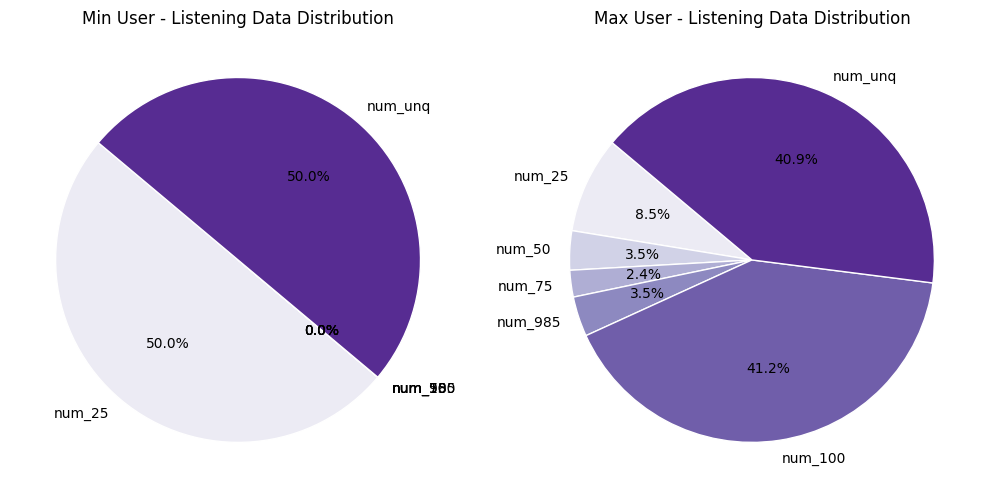

In [19]:
min_user_data = min_user[['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']].values.flatten()
max_user_data = max_user[['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']].values.flatten()

# Pie chart를 그리기 위한 레이블
labels = ['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']
palette = sns.color_palette("Purples", len(labels))

# 1x2 subplot 생성
plt.figure(figsize=(10, 7))

# 첫 번째 파이 차트 (min_user)
plt.subplot(1, 2, 1)
plt.pie(min_user_data, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'}, colors=palette)
plt.title("Min User - Listening Data Distribution")

# 두 번째 파이 차트 (max_user)
plt.subplot(1, 2, 2)
plt.pie(max_user_data, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'}, colors=palette)
plt.title("Max User - Listening Data Distribution")

# 차트 간의 간격을 조정하고 표시
plt.tight_layout()
plt.show()

[1 0 0 0 0]
[ 3807  1549  1055  1579 18355]


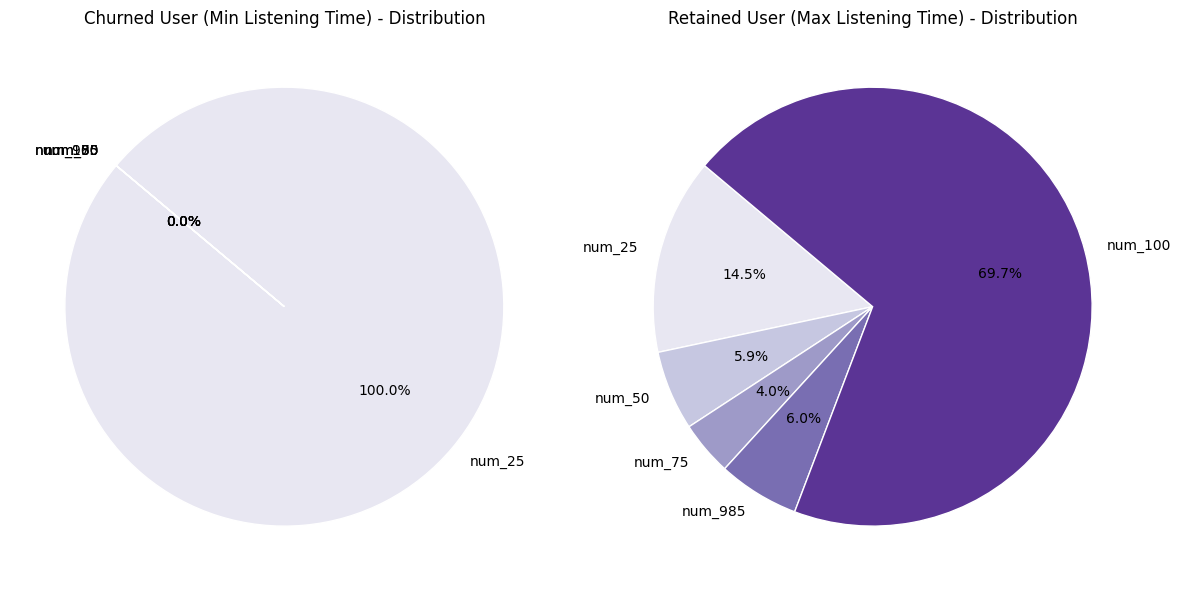

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# is_churn이 1 (Churned User) 중에서 total_secs가 최소인 사용자 찾기
min_churn_user = df[df['is_churn'] == 1].nsmallest(1, 'total_secs')

# is_churn이 0 (Retained User) 중에서 total_secs가 최대인 사용자 찾기
max_retained_user = df[df['is_churn'] == 0].nlargest(1, 'total_secs')

# 분석할 컬럼 선택 및 값 변환
cols = ['num_25', 'num_50', 'num_75', 'num_985', 'num_100']
min_churn_data = min_churn_user[cols].values.flatten()
max_retained_data = max_retained_user[cols].values.flatten()

print(min_churn_data)
print(max_retained_data)

# Pie chart를 그리기 위한 레이블과 색상
labels = cols
palette = sns.color_palette("Purples", len(labels))

# 1×2 subplot 생성
plt.figure(figsize=(12, 6))

# 첫 번째 파이 차트 (Churned User - 최소 청취 시간)
plt.subplot(1, 2, 1)
plt.pie(min_churn_data, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'}, colors=palette)
plt.title("Churned User (Min Listening Time) - Distribution")

# 두 번째 파이 차트 (Retained User - 최대 청취 시간)
plt.subplot(1, 2, 2)
plt.pie(max_retained_data, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'}, colors=palette)
plt.title("Retained User (Max Listening Time) - Distribution")

# 차트 간 간격 조정 및 표시
plt.tight_layout()
plt.show()
